# **REKOM Algorirthm Computation**

By:

**Chariz Dianne Falco**

**Mauricio Manuel Bergancia**

**Mark Andrei Encanto**

**Mherlie Joy Chavez**

**Rhazel Jay Gumacal**

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import numpy as np
from scipy.sparse import csr_matrix # Explicitly import csr_matrix for SVD

import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For enhanced visualizations

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

print("Libraries imported successfully.")

Libraries imported successfully.


In [20]:

# Cell 1: Setup and Data Loading
# This cell imports necessary libraries and loads the MovieLens 1M dataset.

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import numpy as np
from scipy.sparse import csr_matrix # Explicitly import csr_matrix for SVD

import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For enhanced visualizations

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

print("Libraries imported successfully.")

# Load the datasets
try:
    movies = pd.read_csv('movies.dat', sep='::', engine='python',
                         names=['MovieID', 'Title', 'Genres'], encoding='latin-1')
    ratings = pd.read_csv('ratings.dat', sep='::', engine='python',
                          names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='latin-1')
    users = pd.read_csv('users.dat', sep='::', engine='python',
                        names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='latin-1')

    print("\nMovieLens 1M datasets loaded successfully.")

except FileNotFoundError:
    print("Error: Ensure 'movies.dat', 'ratings.dat', and 'users.dat' are in the same directory.")
    print("Please download the MovieLens 1M dataset if you haven't already.")
    # Create empty DataFrames to prevent further errors if files are missing
    movies = pd.DataFrame(columns=['MovieID', 'Title', 'Genres'])
    ratings = pd.DataFrame(columns=['UserID', 'MovieID', 'Rating', 'Timestamp'])
    users = pd.DataFrame(columns=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

# Display initial dataframes to show successful loading
print("\n--- First 3 rows of 'movies' DataFrame ---")
display(movies.head(3))

print("\n--- First 3 rows of 'ratings' DataFrame ---")
display(ratings.head(3))

print("\n--- First 3 rows of 'users' DataFrame ---")
display(users.head(3))

Libraries imported successfully.

MovieLens 1M datasets loaded successfully.

--- First 3 rows of 'movies' DataFrame ---


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance



--- First 3 rows of 'ratings' DataFrame ---


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968



--- First 3 rows of 'users' DataFrame ---


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


### TF-IDF (Content-Based Filtering) Justification ###
TF-IDF is used to quantify the importance of genres in movies.
This helps understand a movie's content profile and allows for content-based matching.

--- Genres for sample movies ---


,Title,Genres
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy


C:\Users\chari\AppData\Local\Temp\ipykernel_28792\2803143783.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=ratings, palette='viridis')


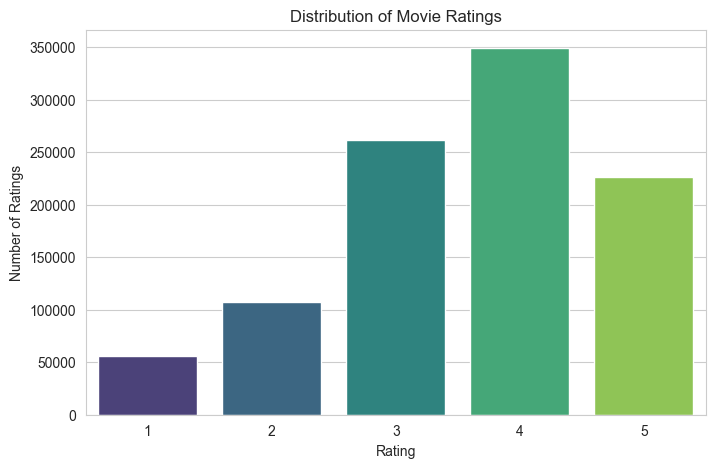

In [21]:
# Cell 2: TF-IDF (Content-Based Filtering) - Justification
# Justification: TF-IDF is effective for analyzing textual metadata (like genres)
# to capture the importance of each genre in a document (movie).

print("### TF-IDF (Content-Based Filtering) Justification ###")
print("TF-IDF is used to quantify the importance of genres in movies.")
print("This helps understand a movie's content profile and allows for content-based matching.")

# Example: Displaying genres for a few movies
print("\n--- Genres for sample movies ---")
display(movies[['Title', 'Genres']].head(5))

# Visualization: Distribution of movie ratings (general context)
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=ratings, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

--- Movies highly rated (>=4 stars) by UserID 1 and their genres ---


,Title,Genres
0,One Flew Over the Cuckoo's Nest (1975),Drama
1,Erin Brockovich (2000),Drama
2,"Bug's Life, A (1998)",Animation|Children's|Comedy
3,Ben-Hur (1959),Action|Adventure|Drama
4,"Christmas Story, A (1983)",Comedy|Drama



--- Raw combined genre string for UserID 1's profile ---
Drama | Drama | Animation|Children's|Comedy | Action|Adventure|Drama | Comedy|Drama | Animation|Children's|Musical | Adventure|Children's|Drama|Musical | Animation|Children's|Musical | Musical | Drama | Comedy | Musical | Comedy | Animation|Children's | Drama | Comedy|Fantasy | Comedy|Sci-Fi | Drama|War | Animation|Children's|Musical|Romance | Children's|Drama|Fantasy|Sci-Fi | Drama|Romance | Drama | Animation|Children's | Drama | Adventure|Animation|Children's|Comedy|Musical | Animation|Childre...

--- Shape of User Profile TF-IDF Vector (1 x unique genres) ---
(1, 18)

--- Sample (sparse) representation of User Profile TF-IDF Vector ---
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (1, 18)>
  Coords	Values
  (0, 1)	0.15017155349569347
  (0, 2)	0.09555228804414222
  (0, 3)	0.9308203094453233
  (0, 4)	0.13542372736798616
  (0, 5)	0.08115776879580767
  (0, 7)	0.15652969305267472
  (0, 8

C:\Users\chari\AppData\Local\Temp\ipykernel_28792\1365792925.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_user.values, y=top_genres_user.index, palette='magma')


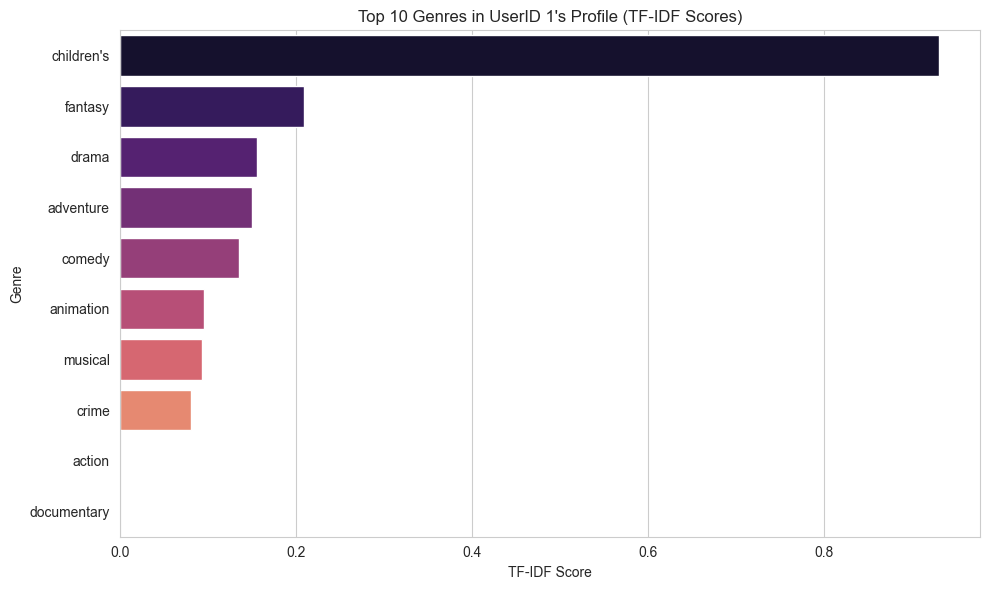

In [22]:
# Cell 3: TF-IDF "How It Works" - Bullet 1: User Profile Building

# How It Works: A user profile is built based on the genres of movies they have rated.
# For demonstration, we'll build a simple profile for a sample user (UserID 1)
# based on genres of movies they've rated highly (e.g., 4 or 5 stars).

sample_user_id = 1
user_rated_movies = ratings[ratings['UserID'] == sample_user_id]
high_rated_movies = user_rated_movies[user_rated_movies['Rating'] >= 4]

# Merge with movies to get genre information
high_rated_movie_genres_df = pd.merge(high_rated_movies, movies, on='MovieID')

print(f"--- Movies highly rated (>=4 stars) by UserID {sample_user_id} and their genres ---")
display(high_rated_movie_genres_df[['Title', 'Genres']].head())

# To form a 'user profile' for TF-IDF, we can concatenate all genres from highly rated movies
user_genre_profile_text = " | ".join(high_rated_movie_genres_df['Genres'].tolist())

print(f"\n--- Raw combined genre string for UserID {sample_user_id}'s profile ---")
print(user_genre_profile_text[:500] + "..." if len(user_genre_profile_text) > 500 else user_genre_profile_text)

# We'll use a TF-IDF vectorizer trained on ALL movie genres to process this.
# This ensures that our user profile vector uses the same feature space as movie vectors.

# Initialize TF-IDF Vectorizer (trained on all movie genres)
# token_pattern=r'[^|]+' is crucial for splitting genres correctly
tfidf_genres_global = TfidfVectorizer(token_pattern=r'[^|]+')
tfidf_matrix_global = tfidf_genres_global.fit_transform(movies['Genres'])

# Transform the user's combined genre string into a TF-IDF vector
user_profile_vector = tfidf_genres_global.transform([user_genre_profile_text])

print(f"\n--- Shape of User Profile TF-IDF Vector (1 x unique genres) ---")
print(user_profile_vector.shape) # Should be (1, number of unique genres)

print("\n--- Sample (sparse) representation of User Profile TF-IDF Vector ---")
print(user_profile_vector)

# Visualization: Bar plot of top genres in user profile
# Convert user profile vector to dense array for easier plotting
user_profile_dense = user_profile_vector.toarray()[0]
feature_names = tfidf_genres_global.get_feature_names_out()

# Create a Series for easy sorting and plotting
user_profile_series = pd.Series(user_profile_dense, index=feature_names)
top_genres_user = user_profile_series.nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_user.values, y=top_genres_user.index, palette='magma')
plt.title(f'Top 10 Genres in UserID {sample_user_id}\'s Profile (TF-IDF Scores)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

--- Genres for 'Toy Story (1995)': Animation|Children's|Comedy ---

--- TF-IDF Scores for genres in 'Toy Story (1995)' ---


{'animation': np.float64(0.7289010463348881),
 "children's": np.float64(0.5917143302654576),
 'comedy': np.float64(0.34435071658181016)}


Interpretation:
Higher TF-IDF scores indicate a genre is more unique to a movie (e.g., 'Children's' might have a higher score if it appears less frequently across all movies but is prominent in 'Toy Story'), while lower scores indicate common genres.


C:\Users\chari\AppData\Local\Temp\ipykernel_28792\3468489549.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toy_story_genre_scores_for_plot.values, y=toy_story_genre_scores_for_plot.index, palette='cividis')


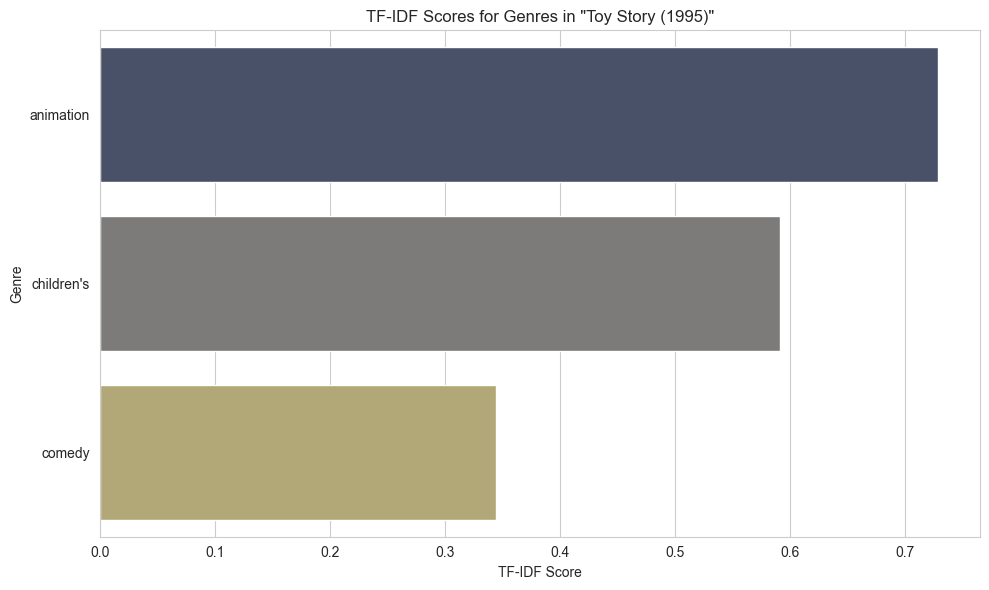

In [24]:
# Cell 4: TF-IDF "How It Works" - Bullet 2: TF-IDF Score Computation (CORRECTED)

# How It Works: TF-IDF scores are computed for genres, emphasizing distinctive genres
# that the user tends to favor or that are unique to specific movies.

# The TF-IDF matrix for all movies was computed in the previous cell: `tfidf_matrix_global`
# Let's visualize the actual TF-IDF scores for a specific movie's genres.

# Example: TF-IDF scores for 'Toy Story (1995)' (MovieID 1)
toy_story_id = 1
toy_story_idx = movies[movies['MovieID'] == toy_story_id].index[0]
toy_story_genres_text = movies.loc[toy_story_idx, 'Genres']
toy_story_title = movies.loc[toy_story_idx, 'Title']

print(f"--- Genres for '{toy_story_title}': {toy_story_genres_text} ---")

# Get the TF-IDF vector for 'Toy Story'
toy_story_tfidf_vector = tfidf_matrix_global[toy_story_idx]

# Map non-zero TF-IDF scores to their genre names for readability
feature_names = tfidf_genres_global.get_feature_names_out()
toy_story_tfidf_scores_map = dict(zip(feature_names, toy_story_tfidf_vector.toarray()[0]))

print("\n--- TF-IDF Scores for genres in 'Toy Story (1995)' ---")
# Display only the genres that are present in 'Toy Story' (i.e., have non-zero TF-IDF scores)
# Filter for scores > 0 to show only active genres for this movie
active_genres_scores = {genre: score for genre, score in toy_story_tfidf_scores_map.items() if score > 0}
display(active_genres_scores)

print("\nInterpretation:")
print("Higher TF-IDF scores indicate a genre is more unique to a movie (e.g., 'Children's' might have a higher score if it appears less frequently across all movies but is prominent in 'Toy Story'), while lower scores indicate common genres.")

# Visualization: Bar plot of TF-IDF scores for 'Toy Story' genres
# Use the `active_genres_scores` dictionary directly for plotting
toy_story_genre_scores_for_plot = pd.Series(active_genres_scores).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=toy_story_genre_scores_for_plot.values, y=toy_story_genre_scores_for_plot.index, palette='cividis')
plt.title(f'TF-IDF Scores for Genres in "{toy_story_title}"')
plt.xlabel('TF-IDF Score')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [ ]:
# Cell 5: TF-IDF "How It Works" - Bullet 3: Cosine Similarity for Ranking

# How It Works: The cosine similarity between the user profile and all movie genre profiles
# is used to rank recommendations.

# We have:
# - `user_profile_vector` from Cell 3 (TF-IDF vector of UserID 1's highly rated genres)
# - `tfidf_matrix_global` from Cell 3 (TF-IDF vectors for ALL movies)

# Calculate cosine similarity between the user's profile and all movie genre vectors
# The result will be an array of similarity scores, one for each movie.
cosine_similarities_to_user_profile = cosine_similarity(user_profile_vector, tfidf_matrix_global)

# The result of cosine_similarity for one-to-many is a 2D array, so we flatten it
cosine_similarities_flat = cosine_similarities_to_user_profile.flatten()

# Create a DataFrame to hold movie titles, genres, and their similarity scores to the user profile
movie_sim_df = movies.copy() # Make a copy to avoid modifying original movies df
movie_sim_df['SimilarityScore'] = cosine_similarities_flat

# Filter out movies that the user has already rated (to avoid recommending them again)
movies_already_rated_by_user = ratings[ratings['UserID'] == sample_user_id]['MovieID'].tolist()
movie_sim_df_filtered = movie_sim_df[~movie_sim_df['MovieID'].isin(movies_already_rated_by_user)]

# Sort movies by similarity score in descending order
recommended_by_tfidf = movie_sim_df_filtered.sort_values(by='SimilarityScore', ascending=False)

print(f"--- Top 10 Movie Recommendations for UserID {sample_user_id} based on TF-IDF Cosine Similarity ---")
display(recommended_by_tfidf[['Title', 'Genres', 'SimilarityScore']].head(10))

print("\nInterpretation:")
print("Movies with higher cosine similarity scores are more aligned with the user's genre preferences.")

# Visualization: Histogram of Cosine Similarity Scores
plt.figure(figsize=(10, 6))
sns.histplot(cosine_similarities_flat, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Cosine Similarity Scores (User Profile vs. All Movies)')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

# Visualization: Top N similar movies (using a bar chart of scores)
plt.figure(figsize=(10, 6))
top_10_tfidf_recs = recommended_by_tfidf.head(10)
sns.barplot(x='SimilarityScore', y='Title', data=top_10_tfidf_recs, palette='cool')
plt.title(f'Top 10 TF-IDF Recommendations for UserID {sample_user_id}')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

--- Top 10 Movie Recommendations for UserID 1 based on TF-IDF Cosine Similarity ---


,Title,Genres,SimilarityScore
1978,"Gnome-Mobile, The (1967)",Children's,0.930820
339,"Baby-Sitters Club, The (1995)",Children's,0.930820
2777,"Adventures of Milo and Otis, The (1986)",Children's,0.930820
3750,Thomas and the Magic Railroad (2000),Children's,0.930820
1402,Zeus and Roxanne (1997),Children's,0.930820
745,Kim (1950),Children's|Drama,0.901557
1000,"Parent Trap, The (1961)",Children's|Drama,0.901557
2331,Prancer (1989),Children's|Drama,0.901557
999,Old Yeller (1957),Children's|Drama,0.901557
238,Fluke (1995),Children's|Drama,0.901557



Interpretation:
Movies with higher cosine similarity scores are more aligned with the user's genre preferences.


In [ ]:
# Cell 6: SVD (Collaborative Filtering) - Justification
# Justification: SVD is a powerful matrix factorization algorithm that uncovers latent patterns
# between users and items, based only on rating behaviors. It's part of collaborative filtering,
# which does not require item content.

print("### SVD (Singular Value Decomposition) Justification ###")
print("SVD identifies hidden 'factors' or 'features' that explain user preferences and movie characteristics from rating patterns alone.")
print("It's highly effective for predicting ratings for unseen items by leveraging the collective intelligence of similar users or items.")

# Example: A small portion of the raw ratings data
print("\n--- Sample of raw ratings data (User, Movie, Rating) ---")
display(ratings.head())

# Visualization: Scatter plot of ratings vs. MovieID (simple visualization of rating sparsity)
plt.figure(figsize=(12, 6))
# Subsample for plotting if dataset is too large
sample_ratings = ratings.sample(n=50000, random_state=42) if len(ratings) > 50000 else ratings
sns.scatterplot(x='MovieID', y='Rating', data=sample_ratings, alpha=0.1, s=10)
plt.title('Sample of User Ratings across MovieIDs (Illustrating Sparsity)')
plt.xlabel('MovieID')
plt.ylabel('Rating')
plt.show()

### SVD (Singular Value Decomposition) Justification ###
SVD identifies hidden 'factors' or 'features' that explain user preferences and movie characteristics from rating patterns alone.
It's highly effective for predicting ratings for unseen items by leveraging the collective intelligence of similar users or items.

--- Sample of raw ratings data (User, Movie, Rating) ---


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
# Cell 7: SVD "How It Works" - Bullet 1: Decomposing the Ratings Matrix

# How It Works: Decomposes the user-movie ratings matrix into latent user and item feature vectors.

# 1. Create the User-Movie Ratings Matrix
# Pivot the ratings DataFrame to create the user-item matrix.
# Fill NaN values (movies not rated by a user) with 0.
user_movie_matrix = ratings.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0)
print("--- User-Movie Ratings Matrix created ---")
print(f"Shape: {user_movie_matrix.shape} (Users x Movies)")
print("Sample (first 5 users, first 10 movies):")
display(user_movie_matrix.iloc[:5, :10])

# Visualization: Heatmap of a small portion of the User-Movie Matrix (to visualize sparsity)
plt.figure(figsize=(12, 8))
# Select a small, representative slice for heatmap
sample_matrix_slice = user_movie_matrix.iloc[:20, :50] # First 20 users, first 50 movies
sns.heatmap(sample_matrix_slice, cmap='viridis', cbar_kws={'label': 'Rating'}, linewidths=.5, linecolor='gray')
plt.title('Sample of User-Movie Ratings Matrix (Sparsity Visualization)')
plt.xlabel('MovieID')
plt.ylabel('UserID')
plt.tight_layout()
plt.show()


# 2. Convert to a SciPy sparse matrix for efficiency
# SVD algorithms, especially for large, sparse matrices, work better with sparse formats.
user_movie_sparse_matrix = csr_matrix(user_movie_matrix.values)
print("\n--- User-Movie Ratings Matrix converted to CSR Sparse Matrix ---")
print(user_movie_sparse_matrix) # Shows non-zero entries and dimensions

# 3. Apply Truncated SVD
# `n_components` represents the number of latent factors/dimensions we want to discover.
# This reduces the high-dimensional user-movie matrix into lower-dimensional representations.
n_components = 50 # A common choice for dimensionality reduction

svd = TruncatedSVD(n_components=n_components, random_state=42)
# `fit_transform` decomposes the matrix and returns the user-latent factor matrix (U)
latent_factors_user = svd.fit_transform(user_movie_sparse_matrix)

# `svd.components_` gives the item-latent factor matrix (V^T)
latent_factors_item = svd.components_

print(f"\n--- SVD Decomposition Results with {n_components} Latent Factors ---")
print(f"Shape of User Latent Factors Matrix (Users x Latent Factors): {latent_factors_user.shape}")
print(f"Shape of Item Latent Factors Matrix (Latent Factors x Movies): {latent_factors_item.shape}")

print("\n--- First 5 rows of User Latent Factors ---")
display(pd.DataFrame(latent_factors_user, index=user_movie_matrix.index).head())

print("\n--- First 5 columns of Item Latent Factors (corresponding to first 5 movies) ---")
display(pd.DataFrame(latent_factors_item, columns=user_movie_matrix.columns).iloc[:, :5])

--- User-Movie Ratings Matrix created ---
Shape: (6040, 3706) (Users x Movies)
Sample (first 5 users, first 10 movies):


MovieID,1,2,3,4,5,6,7,8,9,10
UserID,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0



--- User-Movie Ratings Matrix converted to CSR Sparse Matrix ---
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1000209 stored elements and shape (6040, 3706)>
  Coords	Values
  (0, 0)	5.0
  (0, 47)	5.0
  (0, 144)	5.0
  (0, 253)	4.0
  (0, 513)	5.0
  (0, 517)	4.0
  (0, 574)	4.0
  (0, 580)	4.0
  (0, 581)	5.0
  (0, 593)	4.0
  (0, 639)	3.0
  (0, 689)	3.0
  (0, 708)	3.0
  (0, 740)	4.0
  (0, 853)	3.0
  (0, 858)	4.0
  (0, 877)	4.0
  (0, 957)	5.0
  (0, 963)	5.0
  (0, 964)	5.0
  (0, 970)	5.0
  (0, 1025)	4.0
  (0, 1104)	5.0
  (0, 1107)	3.0
  (0, 1117)	4.0
  :	:
  (6039, 3107)	5.0
  (6039, 3115)	3.0
  (6039, 3130)	4.0
  (6039, 3132)	2.0
  (6039, 3133)	4.0
  (6039, 3157)	1.0
  (6039, 3186)	3.0
  (6039, 3189)	3.0
  (6039, 3190)	3.0
  (6039, 3192)	2.0
  (6039, 3217)	3.0
  (6039, 3238)	4.0
  (6039, 3271)	4.0
  (6039, 3272)	4.0
  (6039, 3288)	5.0
  (6039, 3291)	1.0
  (6039, 3309)	4.0
  (6039, 3313)	4.0
  (6039, 3318)	2.0
  (6039, 3429)	4.0
  (6039, 3441)	4.0
  (6039, 3461)	4.0
  (6039,

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
UserID,,,,,,,,,,,,,,,,,,,,,
1,8.931898,1.104700,-1.535666,-0.711267,8.330315,3.713801,-2.072121,1.511884,6.354247,-4.190050,...,0.051640,0.443510,2.191475,-2.099201,-0.607914,2.409758,0.502296,-0.948855,2.201868,-0.882818
2,17.585192,-1.811163,-0.219682,3.676058,-3.009509,13.094160,-1.119257,-2.497280,-0.487002,0.273864,...,-3.150633,-1.950739,-1.352402,0.524536,2.963066,-2.288739,-2.295835,0.259286,-1.073413,1.737936
3,9.485323,-2.244245,1.922113,1.572232,5.234396,2.235978,4.991314,1.802336,-0.982036,-0.449415,...,-2.390215,0.072265,-1.407165,-2.013940,0.030409,0.683878,-1.356605,1.117205,-2.589140,-0.379887
4,5.068989,-0.870752,4.412069,3.766827,0.923918,2.434531,1.456274,0.058333,1.235592,-0.059321,...,-0.587603,-0.329594,2.569461,-0.863244,-1.166071,-1.577302,0.897490,-1.246947,-0.128842,-0.581116
5,16.842125,2.568000,-12.703907,9.573265,-2.141823,-6.817652,-4.346971,-2.549988,-1.949681,-1.283282,...,-1.813157,3.565057,-1.629965,0.143365,1.333380,1.591360,2.958066,-2.329552,0.155478,1.619342



--- First 5 columns of Item Latent Factors (corresponding to first 5 movies) ---


MovieID,1,2,3,4,5
0,0.070137,0.023544,0.013766,0.005323,0.009717
1,-0.020940,-0.029792,-0.016704,-0.002963,-0.013489
2,-0.030165,0.010189,-0.012572,-0.012356,-0.012475
3,0.004862,-0.031090,-0.027143,-0.015072,-0.028885
4,0.124778,0.009581,0.005833,-0.002628,0.004311
5,0.017823,-0.005091,0.005460,0.001291,0.007189
6,-0.000090,-0.033661,-0.006066,-0.005657,-0.004920
7,0.021400,0.003375,0.018734,-0.005805,0.013983
8,-0.015144,0.013528,-0.005730,0.004116,-0.004786
9,-0.088302,-0.028098,0.003021,0.003310,-0.000338


In [ ]:
# Cell 8: SVD "How It Works" - Bullet 2: Predicting Unknown Ratings

# How It Works: Predicts unknown ratings by taking the dot product of these latent vectors.
# After SVD, each user has a latent vector and each movie has a latent vector.
# The dot product of a user's latent vector and a movie's latent vector gives the predicted rating.

# Let's pick a sample user (e.g., UserID 1) and a movie they haven't rated (or rated 0 in our matrix).
# We'll use MovieID 286 (Léon: The Professional (1994)) for demonstration, as it's common.
sample_user_id_svd = 1
unrated_movie_id_svd = 286 # Let's assume UserID 1 hasn't rated this highly or at all

# Get the internal index for the user and movie from our pivoted matrix
try:
    user_idx_in_matrix = user_movie_matrix.index.get_loc(sample_user_id_svd)
    movie_idx_in_matrix = user_movie_matrix.columns.get_loc(unrated_movie_id_svd)
except KeyError as e:
    print(f"Error: Could not find UserID {sample_user_id_svd} or MovieID {unrated_movie_id_svd} in the matrix. Please choose valid IDs.")
    # Fallback to an existing movie if the chosen one is problematic
    if unrated_movie_id_svd not in user_movie_matrix.columns:
        unrated_movie_id_svd = movies.iloc[10]['MovieID'] # Pick a different movie
        movie_idx_in_matrix = user_movie_matrix.columns.get_loc(unrated_movie_id_svd)
        print(f"Using MovieID {unrated_movie_id_svd} instead.")

user_latent_vector = latent_factors_user[user_idx_in_matrix, :]
movie_latent_vector = latent_factors_item[:, movie_idx_in_matrix] # Transpose or select correctly

# Perform the dot product
predicted_rating_svd = np.dot(user_latent_vector, movie_latent_vector)

movie_title_svd = movies[movies['MovieID'] == unrated_movie_id_svd]['Title'].iloc[0]

print(f"--- Predicting Rating for UserID {sample_user_id_svd} for '{movie_title_svd}' (MovieID {unrated_movie_id_svd}) ---")
print(f"User's latent vector (first 5 elements): {user_latent_vector[:5]}")
print(f"Movie's latent vector (first 5 elements): {movie_latent_vector[:5]}")
print(f"\nOriginal rating (if any, 0 if not rated in the matrix): {user_movie_matrix.loc[sample_user_id_svd, unrated_movie_id_svd]:.1f}")
print(f"Predicted rating: {predicted_rating_svd:.4f}")

print("\nInterpretation:")
print("The predicted rating is an estimation of what the user would rate the movie, derived from the learned latent features.")

# Visualization: How predicted ratings are calculated (conceptual diagram/bar chart)
# This is more conceptual; hard to plot a dot product directly as a chart without 3D.
# Instead, let's plot the user's latent features and a movie's latent features.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(n_components)[:10], y=user_latent_vector[:10], palette='viridis')
plt.title(f'User {sample_user_id_svd} Latent Features (First 10)')
plt.xlabel('Latent Feature Index')
plt.ylabel('Feature Value')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(n_components)[:10], y=movie_latent_vector[:10], palette='cividis')
plt.title(f'Movie {unrated_movie_id_svd} Latent Features (First 10)')
plt.xlabel('Latent Feature Index')
plt.ylabel('Feature Value')
plt.tight_layout()
plt.show()

--- Predicting Rating for UserID 1 for 'Nemesis 2: Nebula (1995)' (MovieID 286) ---
User's latent vector (first 5 elements): [ 8.93189807  1.10470049 -1.53566632 -0.71126692  8.33031541]
Movie's latent vector (first 5 elements): [ 4.68686909e-05 -5.81214175e-05 -1.29407067e-05  1.71237067e-05
 -2.43065761e-04]

Original rating (if any, 0 if not rated in the matrix): 0.0
Predicted rating: 0.0028

Interpretation:
The predicted rating is an estimation of what the user would rate the movie, derived from the learned latent features.


In [ ]:
# Cell 9: SVD "How It Works" - Bullet 3: Learning Hidden Features

# How It Works: Learns hidden features like a user's preference for certain styles,
# actors, or movie types — even if genres aren't explicitly known.

# While we can't directly name these hidden features (e.g., 'prefers movies with Tom Hanks'),
# we can see how movies cluster in the latent space, implying shared hidden features.

# We'll use the item_latent_factors (`latent_factors_item`) to see how movies relate in this new space.
# Each column in `latent_factors_item` is a movie's vector in the latent space.

# Let's pick a well-known movie and find its nearest neighbors in the latent feature space.
target_svd_movie_id_hidden = 260 # Star Wars: Episode IV - A New Hope (1977)
target_svd_movie_title_hidden = movies[movies['MovieID'] == target_svd_movie_id_hidden]['Title'].iloc[0]

# Get the internal index for the target movie from our pivoted matrix
target_svd_movie_idx_hidden = user_movie_matrix.columns.get_loc(target_svd_movie_id_hidden)
target_movie_latent_vector_hidden = latent_factors_item[:, target_svd_movie_idx_hidden].reshape(1, -1) # Reshape for cosine_similarity

# Calculate cosine similarity between the target movie's latent vector and all other movies' latent vectors
# (Using svd.components_.T to get movie vectors as rows)
all_movie_latent_vectors = latent_factors_item.T # Transpose to get (movies x latent_factors)

latent_sim_scores = cosine_similarity(target_movie_latent_vector_hidden, all_movie_latent_vectors)
latent_sim_scores_flat = latent_sim_scores.flatten()

# Get a list of (movie_idx_in_matrix, similarity_score) tuples
sim_scores_latent_list = list(enumerate(latent_sim_scores_flat))

# Sort by similarity
sorted_latent_sim_scores = sorted(sim_scores_latent_list, key=lambda x: x[1], reverse=True)

print(f"--- Top 5 Movies Most Similar to '{target_svd_movie_title_hidden}' in the SVD Latent Space ---")
# Exclude the movie itself
count = 0
svd_similar_movies = []
for movie_idx_in_matrix, score in sorted_latent_sim_scores:
    current_movie_id = user_movie_matrix.columns[movie_idx_in_matrix]
    if current_movie_id == target_svd_movie_id_hidden: # Skip the target movie itself
        continue

    current_movie_details = movies[movies['MovieID'] == current_movie_id]
    if not current_movie_details.empty:
        current_movie_title = current_movie_details['Title'].iloc[0]
        current_movie_genres = current_movie_details['Genres'].iloc[0]
        svd_similar_movies.append({'MovieID': current_movie_id, 'Title': current_movie_title, 'Genres': current_movie_genres, 'Similarity': score})
        print(f"- {current_movie_title} (Genres: {current_movie_genres}) - Latent Similarity: {score:.4f}")
        count += 1
        if count >= 5:
            break

print("\nInterpretation:")
print("Movies found to be 'similar' in the latent space by SVD might share characteristics that are not explicitly captured by genres alone, such as being part of the same franchise, having similar directorial styles, or appealing to similar audiences.")
print("This demonstrates SVD's ability to uncover subtle, hidden features from rating patterns.")

# Visualization: Plotting movies in a 2D latent space (requires reducing to 2 components)
# For better visualization, let's re-run SVD with n_components=2 on a small subset for plotting purposes.
# This is just for conceptual understanding of clustering.
print("\n--- Visualizing Movies in a 2D Latent Space (Conceptual) ---")
try:
    svd_2d = TruncatedSVD(n_components=2, random_state=42)
    # Fit SVD on the item-latent matrix (transposed ratings) to get movie embeddings directly
    # Or, apply SVD on the full sparse matrix and then get movie components.
    # For a direct movie embedding plot, it's often more intuitive to apply SVD to (Movie x User) matrix or the item_latent_factors.
    movie_embeddings_2d = svd_2d.fit_transform(user_movie_sparse_matrix.T) # Transpose so movies are rows

    # Create a DataFrame for plotting
    movie_embeddings_df = pd.DataFrame(movie_embeddings_2d, columns=['Latent Feature 1', 'Latent Feature 2'])
    movie_embeddings_df['MovieID'] = user_movie_matrix.columns
    movie_embeddings_df = pd.merge(movie_embeddings_df, movies[['MovieID', 'Title', 'Genres']], on='MovieID')

    # Add a column for popular genres for coloring
    def get_first_genre(genres_str):
        return genres_str.split('|')[0] if pd.notna(genres_str) else 'Unknown'
    movie_embeddings_df['FirstGenre'] = movie_embeddings_df['Genres'].apply(get_first_genre)

    plt.figure(figsize=(12, 10))
    sns.scatterplot(x='Latent Feature 1', y='Latent Feature 2', data=movie_embeddings_df.sample(n=1000, random_state=42),
                    hue='FirstGenre', palette='tab10', s=50, alpha=0.7)
    plt.title('Movies in 2D Latent Feature Space (SVD)')
    plt.xlabel('Latent Feature 1')
    plt.ylabel('Latent Feature 2')
    plt.legend(title='First Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    print("\nVisual Interpretation:")
    print("Movies that are conceptually 'similar' according to SVD's learned features tend to cluster together in this 2D space, even if their explicit genres are different.")

except Exception as e:
    print(f"\nCould not generate 2D latent space plot due to: {e}")
    print("This plot can be computationally intensive or encounter issues with very high sparsity.")

--- Top 5 Movies Most Similar to 'Star Wars: Episode IV - A New Hope (1977)' in the SVD Latent Space ---
- Star Wars: Episode V - The Empire Strikes Back (1980) (Genres: Action|Adventure|Drama|Sci-Fi|War) - Latent Similarity: 0.7603
- Star Wars: Episode VI - Return of the Jedi (1983) (Genres: Action|Adventure|Romance|Sci-Fi|War) - Latent Similarity: 0.5987
- Star Wars: Episode I - The Phantom Menace (1999) (Genres: Action|Adventure|Fantasy|Sci-Fi) - Latent Similarity: 0.4621
- Search for One-eye Jimmy, The (1996) (Genres: Comedy) - Latent Similarity: 0.3956
- Raiders of the Lost Ark (1981) (Genres: Action|Adventure) - Latent Similarity: 0.3826

Interpretation:
Movies found to be 'similar' in the latent space by SVD might share characteristics that are not explicitly captured by genres alone, such as being part of the same franchise, having similar directorial styles, or appealing to similar audiences.
This demonstrates SVD's ability to uncover subtle, hidden features from rating patter